Our notebook, with everything as functions

In [23]:
#conda install -c conda-forge cmocean
import cmocean
import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
import matplotlib.colorbar as mpl_colorbar

import netCDF4 as nc
import numpy as np
import xarray as xr

%matplotlib inline

In [24]:
def get_bathymetry(imin, imax, jmin, jmax):
    # make our slices
    i_slice = slice(imin, imax)
    j_slice = slice(jmin, jmax)

    # get the bathymetry
    grid = xr.open_dataset(
        'https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSnBathymetry2V1')
    bathy = (grid.bathymetry.isel(gridY=i_slice, gridX=j_slice))
    lats = (grid.latitude.isel(gridY=i_slice, gridX=j_slice))
    lons = (grid.longitude.isel(gridY=i_slice, gridX=j_slice))

    return lats, lons, bathy

In [25]:
def get_trajectories(filename):
    # get the trajectories
    traj = np.loadtxt(filename, delimiter=' ')

    return traj

In [26]:
def bathy_map(lats, lons, bathy):
    # Make a figure and axes with dimensions as desired.
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_axes([0.05, 0.1, 0.9, 0.9])
    mesh = ax.contourf(lons, lats, bathy, cmap=cmocean.cm.deep)
    fig.colorbar(mesh)
    ax.set_xlim((-123.5, -123.1))
    ax.set_ylim((49.05, 49.35))
    return fig, ax

In [31]:
def traj_map(fig, ax, traj):
    # add the trajectories
    deep = -110
    shallow = -35
    ax1 = fig.add_axes([0.05, 0.00, 0.9, 0.05])

    for i in range(traj.shape[0]):
        scaled_z = (traj[i, 3] - deep) / (shallow - deep)
        cmap = plt.cm.plasma
        color = cmap(scaled_z)
        ax.scatter(traj[i, 1], traj[i, 2], c=color)
    norm = mpl_colors.Normalize(vmin=deep, vmax=shallow)
    cb1 = mpl_colorbar.ColorbarBase(
        ax1, cmap=cmap, norm=norm, orientation='horizontal')
    cb1.set_label('Depth (m)')

In [29]:
def plot_outfall(ax, lats, lons, outx, outy):
    # add outfall location
    ax.plot(lons[outy, outx], lats[outy, outx], 'wo')

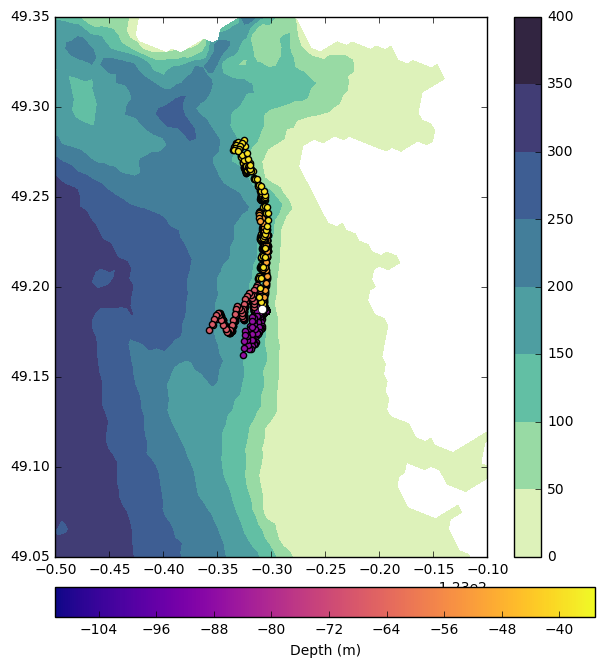

In [32]:
# spatial range of interest
imax = 500 
imin = 400 
jmax = 355
jmin = 255

# position of outfall
outx = 302 - jmin
outy = 444 - imin

# trajectory file
filename = 'traj_2016oct14.txt'

lats, lons, bathy = get_bathymetry(imin, imax, jmin, jmax)
traj = get_trajectories(filename)
fig, ax = bathy_map(lats, lons, bathy)
traj_map(fig, ax, traj)
plot_outfall(ax, lats, lons, outx, outy)

jupyter nbconvert --to script notebook